x torch.Size([300, 2])
t torch.Size([300, 3])


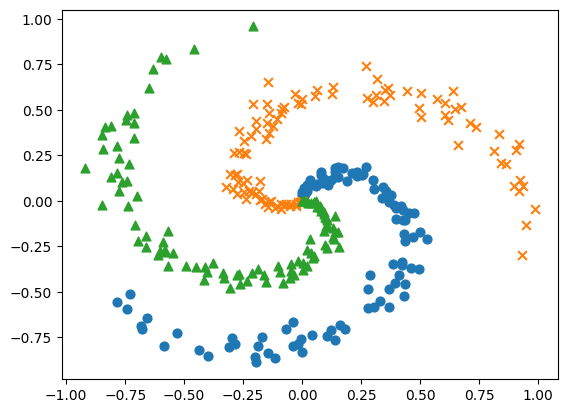

In [14]:
import torch
import matplotlib.pyplot as plt
from dataset import spiral

x, t = spiral.load_data()
x = torch.tensor(x, dtype=torch.float32)
t = torch.tensor(t, dtype=torch.long)

print('x', x.shape)
print('t', t.shape)

N = 100
CLS_NUM = 3
markers = ['o', 'x', '^']
for i in range(CLS_NUM):
    plt.scatter(x[i*N:(i+1)*N, 0], x[i*N:(i+1)*N, 1], s=40, marker=markers[i])
plt.show()


In [15]:
import torch
import torch.nn as nn
import torch.optim as optim

class TwoLayerNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(TwoLayerNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = torch.relu(x)  # Sigmoid를 ReLU로 변경하여 활성화 함수 적용
        x = self.fc2(x)
        return x

| epoch 10 | loss 0.67
| epoch 20 | loss 0.49
| epoch 30 | loss 0.47
| epoch 40 | loss 0.43
| epoch 50 | loss 0.30
| epoch 60 | loss 0.30
| epoch 70 | loss 0.41
| epoch 80 | loss 0.35
| epoch 90 | loss 0.25
| epoch 100 | loss 0.28
| epoch 110 | loss 0.30
| epoch 120 | loss 0.17
| epoch 130 | loss 0.18
| epoch 140 | loss 0.19
| epoch 150 | loss 0.20
| epoch 160 | loss 0.19
| epoch 170 | loss 0.15
| epoch 180 | loss 1.21
| epoch 190 | loss 0.12
| epoch 200 | loss 0.12
| epoch 210 | loss 0.11
| epoch 220 | loss 0.10
| epoch 230 | loss 0.09
| epoch 240 | loss 0.11
| epoch 250 | loss 0.08
| epoch 260 | loss 0.08
| epoch 270 | loss 0.08
| epoch 280 | loss 0.08
| epoch 290 | loss 0.07
| epoch 300 | loss 0.06


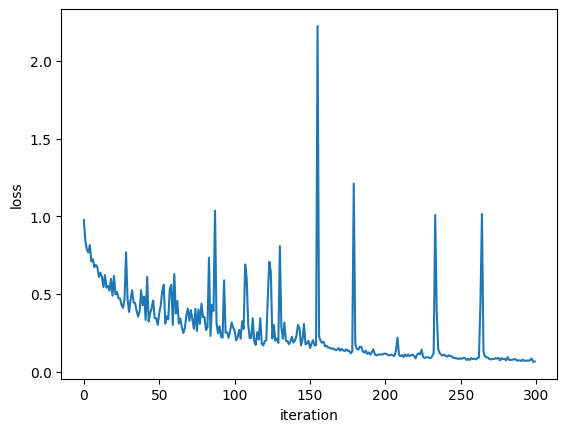

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

# 데이터셋을 TensorDataset으로 변환
dataset = TensorDataset(x, t)
train_loader = DataLoader(dataset, batch_size=30, shuffle=True)

# 모델, 손실 함수, 옵티마이저 정의
model = TwoLayerNet(input_size=2, hidden_size=10, output_size=3)
criterion = nn.CrossEntropyLoss()  # CrossEntropyLoss 사용
optimizer = optim.SGD(model.parameters(), lr=1.0)

# 학습 루프
max_epoch = 300
loss_list = []

for epoch in range(max_epoch):
    model.train()
    total_loss = 0

    for batch_x, batch_t in train_loader:
        # 기울기 초기화
        optimizer.zero_grad()

        batch_t = batch_t.float() 

        output = model(batch_x)  # Output of shape [batch_size, num_classes]
        loss = criterion(output, batch_t)  # 로짓값(output)을 사용
        
        # 역전파
        loss.backward()

        # 가중치 업데이트
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)
    loss_list.append(avg_loss)

    if (epoch + 1) % 10 == 0:
        print(f"| epoch {epoch+1} | loss {avg_loss:.2f}")

# 손실 함수 시각화
plt.plot(np.arange(len(loss_list)), loss_list, label='train')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()


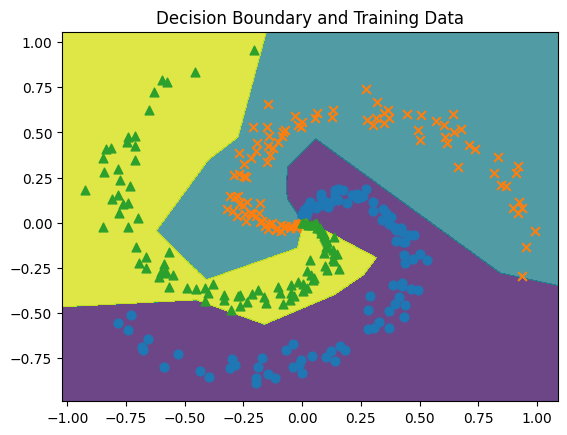

Accuracy on the training set: 97.33%


In [20]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# x와 t가 numpy.ndarray일 경우, torch.Tensor로 변환
x = torch.tensor(x, dtype=torch.float32)  # x를 torch tensor로 변환
t = torch.tensor(t, dtype=torch.long)  # t도 long type으로 변환 (정수형 클래스 레이블)

# 학습 후 모델을 평가모드로 전환
model.eval()

# 그리드 생성하여 예측 수행
h = 0.001  # 해상도
x_min, x_max = x[:, 0].min() - .1, x[:, 0].max() + .1
y_min, y_max = x[:, 1].min() - .1, x[:, 1].max() + .1
xx, yy = torch.meshgrid(torch.arange(x_min, x_max, h), torch.arange(y_min, y_max, h))
X = torch.stack([xx.ravel(), yy.ravel()], dim=1)

# 예측 (로짓값)
with torch.no_grad():
    output = model(X)  # 로짓값
    _, predicted_classes = torch.max(output, 1)
    Z = predicted_classes.numpy().reshape(xx.shape)

# 결정 경계 그리기
plt.contourf(xx, yy, Z, alpha=0.8)

# 학습 데이터 시각화
x, t = spiral.load_data()  # Load data again, as `x` and `t` are overwritten
N = 100
CLS_NUM = 3
markers = ['o', 'x', '^']
for i in range(CLS_NUM):
    plt.scatter(x[i*N:(i+1)*N, 0], x[i*N:(i+1)*N, 1], s=40, marker=markers[i])

plt.title('Decision Boundary and Training Data')
plt.show()

# 학습된 모델로 테스트 데이터에서 성능 평가
model.eval()

# 모델 평가 시 x가 torch.Tensor로 변환되었는지 확인
x_tensor = torch.tensor(x, dtype=torch.float32)  # x를 tensor로 변환
t_tensor = torch.tensor(t, dtype=torch.long)  # t도 tensor로 변환

# 만약 t_tensor가 원-핫 인코딩이라면, argmax로 클래스를 추출
if len(t_tensor.shape) > 1:  # 원-핫 인코딩일 경우
    t_tensor = t_tensor.argmax(dim=1)

with torch.no_grad():
    output = model(x_tensor)
    _, predicted = torch.max(output, 1)
    correct = (predicted == t_tensor).sum().item()
    accuracy = correct / len(t_tensor) * 100
    print(f"Accuracy on the training set: {accuracy:.2f}%")
